UNHCR EDA Project

1. Introduction

Given world events of the past few years, I thought it would be interesting to look at UN refugee data to try to understand if we are going through a particularly rough period of modern history or if these large refugee flows are much more normal than most people would expect. I set out to examine the global trends in refugee flows and to try to figure out which countries have the most issues and the countries that are most accepting of refugees. My hypothesis is that refugee flows have actually been fairly constant over this time period (1975-2021) since there is always some conflict going on that creates refugee issues. However, the location of the large refugee issues will change. For instance, Europe generally does not have a refugee problem, but it did in the 1990s because of the Yugoslav wars. Another example is the middle east has more of a refugee issue now than in the past becuase of US intervention in the region. An additional hypothesis is that European countries and the US are much more accepting of refugees than other countries are.

2. Data Explained

Link: https://data.un.org/Data.aspx?q=refugees&d=UNHCR&f=indID%3aType-Ref

The original data had over 94,379 rows. At first I dropped the rows with NA values, which left me with 94,375 rows. When looking at the refugee flows, the median number of refugees was 31, the mode was 5 and the mean was 6,086. This means that most of the refugee flows are fairly small and unsubstantial. Not to take away from the plight of these people, which are just as grave as the larger flows, but analyzing the larger flows rather than all of them would make for a better understanding of the larger trends, which is what I'm interested in. I decided to get rid of all of the flows of less than 6,086 refugees, which left me with 5,823 rows, whic is a more manageable number to work with. This still left 95% of the total refugees. I also got rid of two columns "Total refugees and people in refugee-like situations**" and "Total refugees and people in refugee-like situations assisted by UNHCR" since these values were very similar to those of the columns "Refugees*" and "Refugees assisted by UNHCR". Lastly, I added continent of origin and continent of asylum, so I could look at larger regional trends rather than just country by country.

Final Data Dictionary:

- Country of asylum: String indicating the country where refugees are now.
- Country of origin: String indicating the country where refugees came from.
- Continent of asylum: String indicating the continent where refugees are now. If the country does not have a country code or is unknown then the continent is indicated as Unknown.
- Continent of origin: String indicating the continent where refugees came from. If the country does not have a country code or is unknown then the continent is indicated as unknown.
- Year: Int that represents the year that the migration took place.
- Refugees: Int that represents the number of refugees in the migration.
- Refugees assisted by UNHCR: Int that represents the number of refugees in the migration assisted by the UNHCR (United Nations High Commisioner for Refugees).

3. Results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ref = pd.read_csv("EDA Phase 1 UN Refugee Data.csv")

C:\Users\ianre\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5823 entries, 0 to 5822
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country of asylum           5823 non-null   object
 1   Country of origin           5823 non-null   object
 2   Continent of asylum         5823 non-null   object
 3   Continent of origin         5823 non-null   object
 4   Year                        5823 non-null   int64 
 5   Refugees                    5823 non-null   int64 
 6   Refugees assisted by UNHCR  5823 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 318.6+ KB


In [3]:
years = ref['Year'].unique()

In [4]:
y = {
    'Years' : years,
    'Refugees' : [None] * len(years),
    'UNHCR Refugees' : [None] * len(years)
}
y = pd.DataFrame(y)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Years           47 non-null     int64 
 1   Refugees        0 non-null      object
 2   UNHCR Refugees  0 non-null      object
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


In [5]:
for i in years:
    count1=ref.loc[ref['Year'] == i, 'Refugees'].sum()
    y.loc[y['Years']==i, 'Refugees']=count1
    count2=ref.loc[ref['Year'] == i, 'Refugees assisted by UNHCR'].sum()
    y.loc[y['Years']==i, 'UNHCR Refugees']=count2
y['Refugees'] = y['Refugees'].astype(int)
y['UNHCR Refugees'] = y['UNHCR Refugees'].astype(int)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Years           47 non-null     int64
 1   Refugees        47 non-null     int32
 2   UNHCR Refugees  47 non-null     int32
dtypes: int32(2), int64(1)
memory usage: 884.0 bytes


In [6]:
y.sort_values(by='Years',inplace=True,ascending=True)

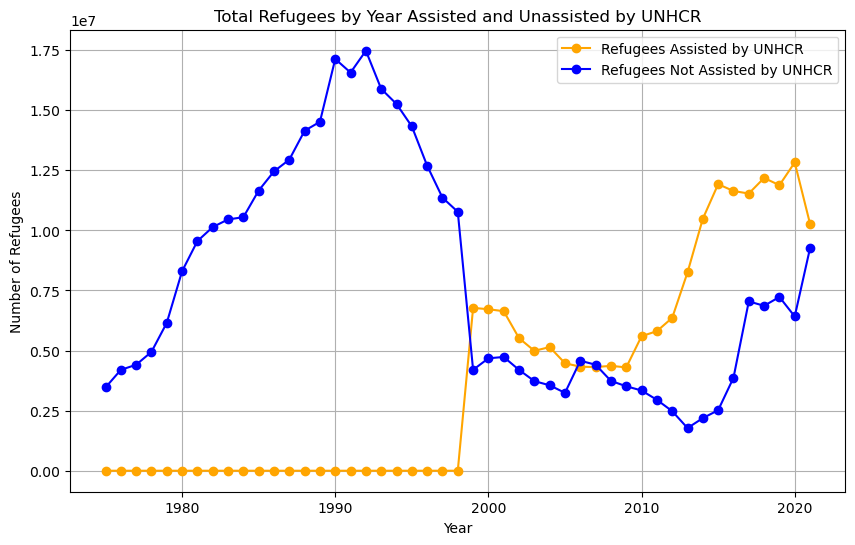

In [9]:
import matplotlib.pyplot as plt

# Sample data
years = y['Years']
total_refugees = y['Refugees']
refugees_assisted_by_UNHCR = y['UNHCR Refugees']

# Calculate the number of refugees not assisted by UNHCR
refugees_not_assisted_by_UNHCR = [total - assisted for total, assisted in zip(total_refugees, refugees_assisted_by_UNHCR)]

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot refugees assisted by UNHCR
ax.plot(years, refugees_assisted_by_UNHCR, marker='o', color='orange', label='Refugees Assisted by UNHCR')

# Plot refugees not assisted by UNHCR
ax.plot(years, refugees_not_assisted_by_UNHCR, marker='o', color='blue', label='Refugees Not Assisted by UNHCR')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Refugees')
ax.set_title('Total Refugees by Year Assisted and Unassisted by UNHCR')
ax.legend()
ax.grid(True)

# Display the plot
plt.show()

This shows the total flow of refugees by year. This goes against what I had initially thought. There is a steady increase in the number of refugees until 1991, and then the number begins to decline. By far the largest number of wordlwide refugees come from Afghanistan, and 1991 marks the end of the Cold War and prior to that, the end of the Soviet invasion in the late 80s, which likely has to do with the declining refugee numbers. The numbers continue to decline and remain around 10 million per year until 2013 when they start to increase dramatically. This has to do with the Syrian civil war, which is the second largest worldwide refugee crisis of this time period (1975-2021). The refugees assisted by UNHCR are also worth noting because they did not asisst or at least did not record their assistance prior to 1999, but since then have assisted the majority of refugees every year. 

In [10]:
continents = ['Africa','Asia','Europe','North America','Oceania','South America','Unknown']

In [11]:
Source = ["Africa","Africa","Africa","Africa","Africa","Africa","Africa","Asia","Asia","Asia","Asia","Asia","Asia","Asia",
          "Europe","Europe","Europe","Europe","Europe","Europe","Europe","North America","North America","North America","North America",
         "North America","North America","North America","Oceania","Oceania","Oceania","Oceania","Oceania","Oceania","Oceania",
         "South America","South America","South America","South America","South America","South America","South America",
         "Unknown","Unknown","Unknown","Unknown","Unknown","Unknown","Unknown"]

In [12]:
Target = ['Africa','Asia','Europe','North America','Oceania','South America','Unknown','Africa','Asia','Europe','North America','Oceania','South America','Unknown',
         'Africa','Asia','Europe','North America','Oceania','South America','Unknown','Africa','Asia','Europe','North America','Oceania','South America','Unknown',
         'Africa','Asia','Europe','North America','Oceania','South America','Unknown','Africa','Asia','Europe','North America','Oceania','South America','Unknown',
         'Africa','Asia','Europe','North America','Oceania','South America','Unknown']

In [13]:
Refugees = [None] * len(Target)

In [14]:
count=0
for i in continents:
    for j in continents:
        n=ref.loc[(ref['Continent of origin'] == i) & (ref['Continent of asylum'] == j), 'Refugees'].sum()
        Refugees[count]=n
        count+=1     

In [17]:
print(Refugees)

[172022813, 4704354, 4291833, 1388144, 66470, 0, 295075, 3185012, 248090770, 18362024, 5797630, 560781, 0, 9200, 0, 148382, 16615383, 3650146, 129458, 0, 0, 0, 0, 0, 4761450, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 286658, 730891, 0, 950296, 0, 6505508, 2258633, 30115821, 14310077, 2876116, 688899, 3378038]


In [25]:
data = {
    'Source': Source,
    'Target': Target,
    'Refugees': Refugees
}

df = pd.DataFrame(data)

In [26]:
import plotly.graph_objects as go
# Extract unique continents
continents = list(set(df['Source']).union(set(df['Target'])))

# Create a mapping from continent to index
continent_to_index = {continent: i for i, continent in enumerate(continents)}

# Create the source, target, and value lists for the Sankey diagram
source = [continent_to_index[continent] for continent in df['Source']]
target = [continent_to_index[continent] for continent in df['Target']]
value = df['Refugees'].tolist()

# Create the Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=continents
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(title_text="Refugee Transfers Between Continents", font_size=10)
fig.show()

This is a flow diagram representng the refugee flows from continent to contient. As we can see, the vast majority of refugees come from Africa and Asia, which is no surprise since these are the two largest and most populous continents, and also the two continents that have seen the most violence in recent years (until 2022, but this data only goes until 2021, so it does not cover the Russian invasion of Ukraine). We can also see that the vast majority of refugees stay in the continent where they fled from with some going abroad. The largest inter-continent migration is from Asia to Europe, which is 18 million individuals. Large portions of the refugees coming into North America and Europe are of unknown origin (14 million and 30 million respectively). South America is also interesting considering it does not take in many refugees, but also does not produce many.

In [27]:
countries_origin = ref["Country of origin"].unique()
c_o = {
    'Countries' : countries_origin,
    'Total Refugees' : [None] * len(countries_origin),
    'UNHCR Refugees' : [None] * len(countries_origin)
}

In [28]:
c_o = pd.DataFrame(c_o)
c_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Countries       93 non-null     object
 1   Total Refugees  0 non-null      object
 2   UNHCR Refugees  0 non-null      object
dtypes: object(3)
memory usage: 2.3+ KB


In [29]:
for i in countries_origin:
    count=ref.loc[ref['Country of origin'] == i, 'Refugees'].sum()
    c_o.loc[c_o['Countries']==i, 'Total Refugees']=count
    count2=ref.loc[ref['Country of origin'] == i, 'Refugees assisted by UNHCR'].sum()
    c_o.loc[c_o['Countries']==i, 'UNHCR Refugees']=count2
c_o['Total Refugees'] = c_o['Total Refugees'].astype(int)
c_o['UNHCR Refugees'] = c_o['UNHCR Refugees'].astype(int)
c_o.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Countries       93 non-null     object
 1   Total Refugees  93 non-null     int32 
 2   UNHCR Refugees  93 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 1.6+ KB


In [30]:
c_o.sort_values(by='Total Refugees',inplace=True,ascending=False)

In [31]:
#Converting these countries to names that match with the names of the GeoPandas package

c_o.loc[c_o['Countries'] == 'Venezuela (Bolivarian Republic of)', 'Countries'] = "Venezuela"
c_o.loc[c_o['Countries'] == 'Syrian Arab Rep.', 'Countries'] = "Syria"
c_o.loc[c_o['Countries'] == 'Iran (Islamic Rep. of)', 'Countries'] = "Iran"
c_o.loc[c_o['Countries'] == 'South Sudan', 'Countries'] = "S. Sudan"
c_o.loc[c_o['Countries'] == 'Russian Federation', 'Countries'] = "Russia"
c_o.loc[c_o['Countries'] == 'State of Palestine', 'Countries'] = "Palestine"
c_o.loc[c_o['Countries'] == 'Dem. Rep. of the Congo', 'Countries'] = "Dem. Rep. Congo"
c_o.loc[c_o['Countries'] == 'Viet Nam', 'Countries'] = "Vietnam"
c_o.loc[c_o['Countries'] == 'Serbia and Kosovo: S/RES/1244 (1999)', 'Countries'] = "Serbia"
c_o.loc[c_o['Countries'] == 'Lao People\'s Dem. Rep.', 'Countries'] = "Laos"
c_o.loc[c_o['Countries'] == 'Congo, Republic of', 'Countries'] = "Congo"
c_o.loc[c_o['Countries'] == 'Rep. of Moldova', 'Countries'] = "Moldova"
c_o.loc[c_o['Countries'] == 'Western Sahara', 'Countries'] = "W. Sahara"

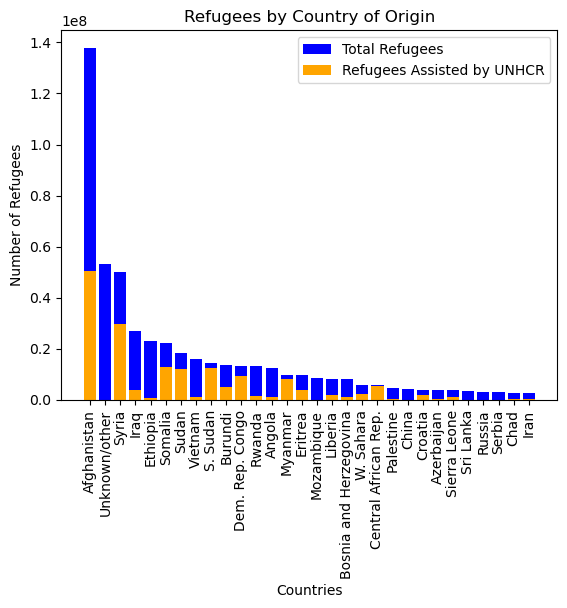

In [32]:
c_o2 = c_o.head(30)
countries = c_o2['Countries']
total_refugees = c_o2['Total Refugees']
refugees_assisted_by_UNHCR = c_o2['UNHCR Refugees']

# Calculate the percentage of refugees assisted by UNHCR
percentage_assisted = [ra / tr * 100 for ra, tr in zip(refugees_assisted_by_UNHCR, total_refugees)]

# Plotting
fig, ax = plt.subplots()

# Stacked bar plot
bottom = np.zeros(len(countries))
for i, (total, assisted) in enumerate(zip(total_refugees, refugees_assisted_by_UNHCR)):
    bar = ax.bar(i, total, label='Total Refugees', color='blue', bottom=bottom[i])
    ax.bar(i, assisted, label='Refugees Assisted by UNHCR', color='orange', bottom=bottom[i])
    bottom[i] += total

# Set labels and title
ax.set_xlabel('Countries')
ax.set_ylabel('Number of Refugees')
ax.set_title('Refugees by Country of Origin')
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries,rotation='vertical')
legend_labels = ['Total Refugees', 'Refugees Assisted by UNHCR']
ax.legend(legend_labels)



# Display the plot
plt.show()

This graph shows the top 30 refugee origin countries. What this showed me is the nature of the refugee flows described in the dataset. It is not the number of refugees, but the flow, which is why it shows almost 140 million Afghan refugees depsite Afghanistan only having a population of around 39 million today (https://www.cia.gov/the-world-factbook/countries/afghanistan/#people-and-society). This means that refugees will be counted mutliple times depending on how many countries they migrate to. Unknown has the second most followed by Syria with around 50 million refugee movements each. After that come Iraq, Ethiopia, Somalia and Sudan. This shows that the Afghanistan refugee crisis is the worst in the world, and it makes sense considering Afghanistan has been in a state of conflict for virtually the last 40 years. The case of Syria is also very sad considering it has the second most refugees (excluding Unknown), but it's refugee issues are only 10 years old.

In [33]:
import plotly.express as px
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a GeoDataFrame from the world DataFrame
gdf = world.merge(c_o, how='left', left_on='name', right_on='Countries')

# Create a Plotly choropleth map
fig = px.choropleth(gdf,
                    geojson=gdf.geometry,
                    locations=gdf.index,
                    color='Total Refugees',
                    hover_name=gdf['name'],
                    projection='natural earth',
                    title='Refugee Origins',
                    color_continuous_scale='Reds')

# Show the plot
fig.show()

C:\Users\ianre\AppData\Local\Temp\ipykernel_10596\3187247388.py:4: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



This is a map showing the countries of origin of refugees. I decided to have two separate maps indicating country of origin and country of asylum to make it slightly more clear. The countries in gray are also intersting since they did not produce any large flows of refugees during this time period. This can be used as a proxy for country stability.

In [34]:
countries_asylum = ref["Country of asylum"].unique()
c_a = {
    'Countries' : countries_asylum,
    'Total Refugees' : [None] * len(countries_asylum),
    'UNHCR Refugees' : [None] * len(countries_asylum)
 }

In [35]:
c_a = pd.DataFrame(c_a)
c_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Countries       123 non-null    object
 1   Total Refugees  0 non-null      object
 2   UNHCR Refugees  0 non-null      object
dtypes: object(3)
memory usage: 3.0+ KB


In [36]:
for i in countries_asylum:
    count=ref.loc[ref['Country of asylum'] == i, 'Refugees'].sum()
    c_a.loc[c_a['Countries']==i, 'Total Refugees']=count
    count2=ref.loc[ref['Country of asylum'] == i, 'Refugees assisted by UNHCR'].sum()
    c_a.loc[c_a['Countries']==i, 'UNHCR Refugees']=count2
c_a['Total Refugees'] = c_a['Total Refugees'].astype(int)
c_a['UNHCR Refugees'] = c_a['UNHCR Refugees'].astype(int)
c_a.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Countries       123 non-null    object
 1   Total Refugees  123 non-null    int32 
 2   UNHCR Refugees  123 non-null    int32 
dtypes: int32(2), object(1)
memory usage: 2.1+ KB


In [37]:
c_a.loc[c_a['Countries'] == 'Venezuela (Bolivarian Republic of)', 'Countries'] = "Venezuela"
c_a.loc[c_a['Countries'] == 'Syrian Arab Rep.', 'Countries'] = "Syria"
c_a.loc[c_a['Countries'] == 'Iran (Islamic Rep. of)', 'Countries'] = "Iran"
c_a.loc[c_a['Countries'] == 'South Sudan', 'Countries'] = "S. Sudan"
c_a.loc[c_a['Countries'] == 'Russian Federation', 'Countries'] = "Russia"
c_a.loc[c_a['Countries'] == 'State of Palestine', 'Countries'] = "Palestine"
c_a.loc[c_a['Countries'] == 'Dem. Rep. of the Congo', 'Countries'] = "Dem. Rep. Congo"
c_a.loc[c_a['Countries'] == 'Viet Nam', 'Countries'] = "Vietnam"
c_a.loc[c_a['Countries'] == 'Serbia and Kosovo: S/RES/1244 (1999)', 'Countries'] = "Serbia"
c_a.loc[c_a['Countries'] == 'Lao People\'s Dem. Rep.', 'Countries'] = "Laos"
c_a.loc[c_a['Countries'] == 'Congo, Republic of', 'Countries'] = "Congo"
c_a.loc[c_a['Countries'] == 'Rep. of Moldova', 'Countries'] = "Moldova"
c_a.loc[c_a['Countries'] == 'Western Sahara', 'Countries'] = "W. Sahara"
c_a.loc[c_a['Countries'] == 'United Rep. of Tanzania', 'Countries'] = "Tanzania"

In [38]:
c_a.sort_values(by='Total Refugees',inplace=True,ascending=False)

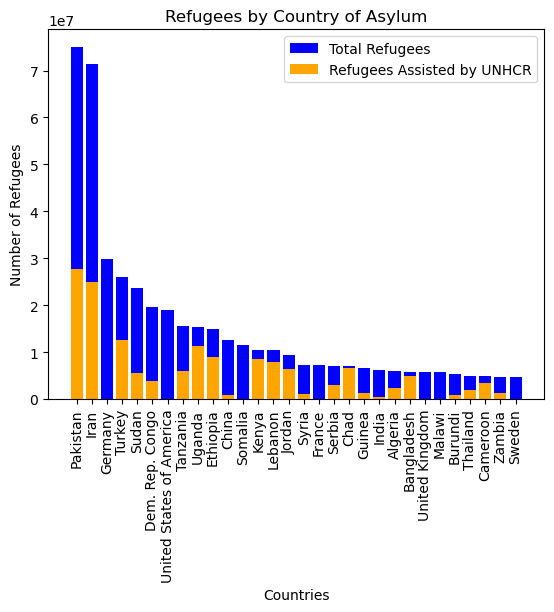

In [39]:
c_a2 = c_a.head(30)
countries = c_a2['Countries']
total_refugees = c_a2['Total Refugees']
refugees_assisted_by_UNHCR = c_a2['UNHCR Refugees']

# Calculate the percentage of refugees assisted by UNHCR
percentage_assisted = [ra / tr * 100 for ra, tr in zip(refugees_assisted_by_UNHCR, total_refugees)]

# Plotting
fig, ax = plt.subplots()

# Stacked bar plot
bottom = np.zeros(len(countries))
for i, (total, assisted) in enumerate(zip(total_refugees, refugees_assisted_by_UNHCR)):
    bar = ax.bar(i, total, label='Total Refugees', color='blue', bottom=bottom[i])
    ax.bar(i, assisted, label='Refugees Assisted by UNHCR', color='orange', bottom=bottom[i])
    bottom[i] += total

# Set labels and title
ax.set_xlabel('Countries')
ax.set_ylabel('Number of Refugees')
ax.set_title('Refugees by Country of Asylum')
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries,rotation='vertical')
legend_labels = ['Total Refugees', 'Refugees Assisted by UNHCR']
ax.legend(legend_labels)



# Display the plot
plt.show()

This graph shows the top 30 countries by asylum seekers. European countries are not as high on this list as I would have initially thought, but seeing Germany above the US was very interesting. Pakistan and Iran as the top two make a lot of sense considering they border Afghanistan, which is the largest producer of refugees. Iran also borders Iraq, which has also produced a lot of refugees. Likewise, Turkey at 4 makes a lot of sense considering it borders Syria. The number of refugees seeking asylum in Pakistan and Iran is staggering, but it makes much more sense if you view their stays as temporary. Recently, 1.7 million Afghans were ordered by the Pakistani government to return to Afghanistan (https://www.cbsnews.com/news/pakistan-afghanistan-refugees-deportation/). This shuttling of people has undoubetdly occured many times in the past. I have no way of learning this from the data, but I bet many of those 70 million have been forced to seek asylum in Pakistan multiple times moving between the two countries every few years depending on the situations in both nations.

In [40]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a GeoDataFrame from the world DataFrame
gdf = world.merge(c_a, how='left', left_on='name', right_on='Countries')

# Create a Plotly choropleth map
fig = px.choropleth(gdf,
                    geojson=gdf.geometry,
                    locations=gdf.index,
                    color='Total Refugees',
                    hover_name=gdf['name'],
                    projection='natural earth',
                    title='Refugee Asylum',
                    color_continuous_scale='Greens')

# Show the plot
fig.show()

C:\Users\ianre\AppData\Local\Temp\ipykernel_10596\2743109220.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



Here we can see a clear picture of where refugees seek asylum. Aside form the countries I mentioned, countries in east and central Africa also shelter many refugees. This is a sad situation since many of those refugees flee from a hostile conflict zone only to enter another one as Sudan, the DRC, Ethiopia and Somalia are some of the top destinations of asylum seekers as well as the top producers of refugees.

In [41]:
ref.sort_values(by='Refugees',inplace=True,ascending=False)
ref.head(30)

,Country of asylum,Country of origin,Continent of asylum,Continent of origin,Year,Refugees,Refugees assisted by UNHCR
166,Turkey,Syrian Arab Rep.,Asia,Asia,2021,3685839,0
362,Turkey,Syrian Arab Rep.,Asia,Asia,2020,3641370,1213790
755,Turkey,Syrian Arab Rep.,Asia,Asia,2018,3622366,1750000
562,Turkey,Syrian Arab Rep.,Asia,Asia,2019,3576370,500000
936,Turkey,Syrian Arab Rep.,Asia,Asia,2017,3424237,1150000
4877,Pakistan,Afghanistan,Asia,Asia,1989,3272290,0
4971,Pakistan,Afghanistan,Asia,Asia,1988,3254393,0
4781,Pakistan,Afghanistan,Asia,Asia,1990,3253000,0
4658,Iran (Islamic Rep. of),Afghanistan,Asia,Asia,1991,3186616,0
5053,Pakistan,Afghanistan,Asia,Asia,1987,3156000,0


This last chart is the top 30 refugee migrations of the period. As we have seen from earlier, most of them are the usual suspects, that is migrations from Afghanistan to Pakistan or Iran and migrations from Syria to Turkey. The only one out of the top 30 that is not one of these is from Ethiopia to Somalia in 1980. Most of the large migrations out of Afghanistan occured in the 1980s and the large migrations from Syria into Turkey have occured in the past 10 years. In fact, the five largest refugee migrations of this entire period were refugees fleeing from Syria to Turkey from 2017-2021.

4. Summary

I was able to figure out many of the largest refugee flows in the period from 1975-2021 and got a better sense of the state of refugee migrations during this time period. The dire situations in Afghanistan and Syria stood out. I also got a clearer idea of where most refugees end up fleeing to, which is neighboring countries. This makes a lot of sense even though most of them do not stay there permantently, which is why almost 70 million refugees have entered Iran and Pakistan during this time period. This however, is only one stop on the journey of these refugees and is seldom the final destination. Seeing the maps also helped me vizualize global conflicts during this time period.

It would have been nice to have data for just the initial refugees and not have the double counts that were seen in this dataset. However, even though this is not what I was looking for intially, it was actually extremely interesting since it shows how bad the plight of these refugees, particularly the ones form Afghanistan are since asylum in one country can be very fleeting. It answered a different question than what I was initially looking for, but still gives a good picture of the refugee situation around the world. 

Overall, I think this was very interesting and I learned a lot about both the refugee crises of recent times as well as gained a better understanding of global conflict during the time period. Some next steps would be to examine the refugee flows in the top refugee producing countries by year as well as see where the refugee arriving on European and American shores are coming from. Additonally, it would be nice to incorporate data from 1945-1975 and data from the war in Ukraine. The war in Ukraine has produced a massive refugee crisis that is the worst that Europe has seen since the Yugoslav wars of the 1990s. The period from 1945-1975 was also more tumultuous than the late Cold War and post Cold War era covered here, so it would be interesting to see how the data from this period looked. However, the UN was a new organiztaion at this time, so the data would not be as good and is also not available on the UN Data website.